***

# Ej. 6. TNG300 - FVR

***

The IllustrisTNG simulations represent the most ambitious attempt to run with the same model of magnetohydrodynamic galaxy formation across the largest number of cosmological boxes of different sizes and particle/cell resolutions. There are currently a total of 20 simulations, across three sizes of cosmological boxes (50, 100, and 300 Mpc on a side). For each size, there are three different resolutions (e.g., TNG100-1, TNG100-2, TNG100-3), although TNG50 has an additional resolution, and all are available in Dark Matter Only and hydrodynamic versions. All of their data are in the public domain.
The physical model used is called AREPO (Springel et al. 2010), which since 2019 has also been publicly available (https://arepo-code.org/). It is an Eulerian model. Unlike Smooth Particle Hydrodynamics (SPH) models, which calculate the dynamic evolution of particles, AREPO considers space subdivided into cells, which change shape depending on resolution needs. This type of model offers several advantages when modeling gas hydrodynamics, such as better behavior in shock zones. Additionally, it is one of the first to involve magnetism in hydrodynamic equations (see, if curiosity drives you, the work of Pakmor, 2016). The best way to learn about the project in detail is to explore its website https://www.tng-project.org/, and read some of the associated papers https://www.tng-project.org/results/.

In this practice, we will work with data already extracted from the simulation, and the variable names correspond to those described in https://www.tng-project.org/data/docs/specifications/#sec2b, which must be consulted to understand what the names represent and what units they have.

The data come from the IllustrisTNG300 simulation, which has 14,485,709 galaxies distributed in a box that is 205,000 $h^{-1}$ kpc on a side

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [174]:
h = 0.6774
mass_conv = 1e10

f = h5py.File('Data-TNG300.hdf5', 'r')

print(f.keys()) 
SubhaloHalfmassRadType = f['SubhaloHalfmassRadType'][:]
SubhaloMassInHalfRadType = f['SubhaloMassInHalfRadType'][:]
SubhaloMass_0 = f['SubhaloMass'][:]
SubhaloMassType = f['SubhaloMassType'][:]
# It has 6 types of particles: Gas, DM, (), Tracers, Stars & Wind, BHs
# In units of M_Sun/h
SubhaloPos = f['SubhaloPos'][:]
SubhaloSFR = f['SubhaloSFR'][:]
SubhaloSFRinHalfRad = f['SubhaloSFRinHalfRad'][:]


SubhaloStellarPhotometrics = f['SubhaloStellarPhotometrics'][:]

f.close()

<KeysViewHDF5 ['SubhaloHalfmassRadType', 'SubhaloMass', 'SubhaloMassInHalfRadType', 'SubhaloMassType', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloStellarPhotometrics']>


# Ej. 6. Mass-luminosity relation, and stellar mass - halo mass relation:

Represent the relation between stellar mass and luminosity ($M_r$), and the relation between the stellar mass content and the dark matter content of the dark matter halo.

Suggestion: use the numpy function *polyfit* to perform the line fitting..

The luminosity in absolute magnitude is given by M_r, where r is given by:

In [179]:
r_mag_0 = SubhaloStellarPhotometrics[:, 5]
StellarMass = SubhaloMassType[:,4] * mass_conv / h
DMMass = SubhaloMassType[:,1] * mass_conv / h
SubhaloMass = SubhaloMass_0  * mass_conv / h

Let's see how it looks like the r-mag distribution:

In [180]:
# There are wrong magnitudes, we filter them

mask = (r_mag_0<1e3)
r_mag, StellarMass_1 = r_mag_0[mask], StellarMass[mask]

### i. Stellar mass vs. luminosity:

/tmp/ipykernel_1039083/3052562549.py:6: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(np.log10(StellarMass_1), r_mag, 1)


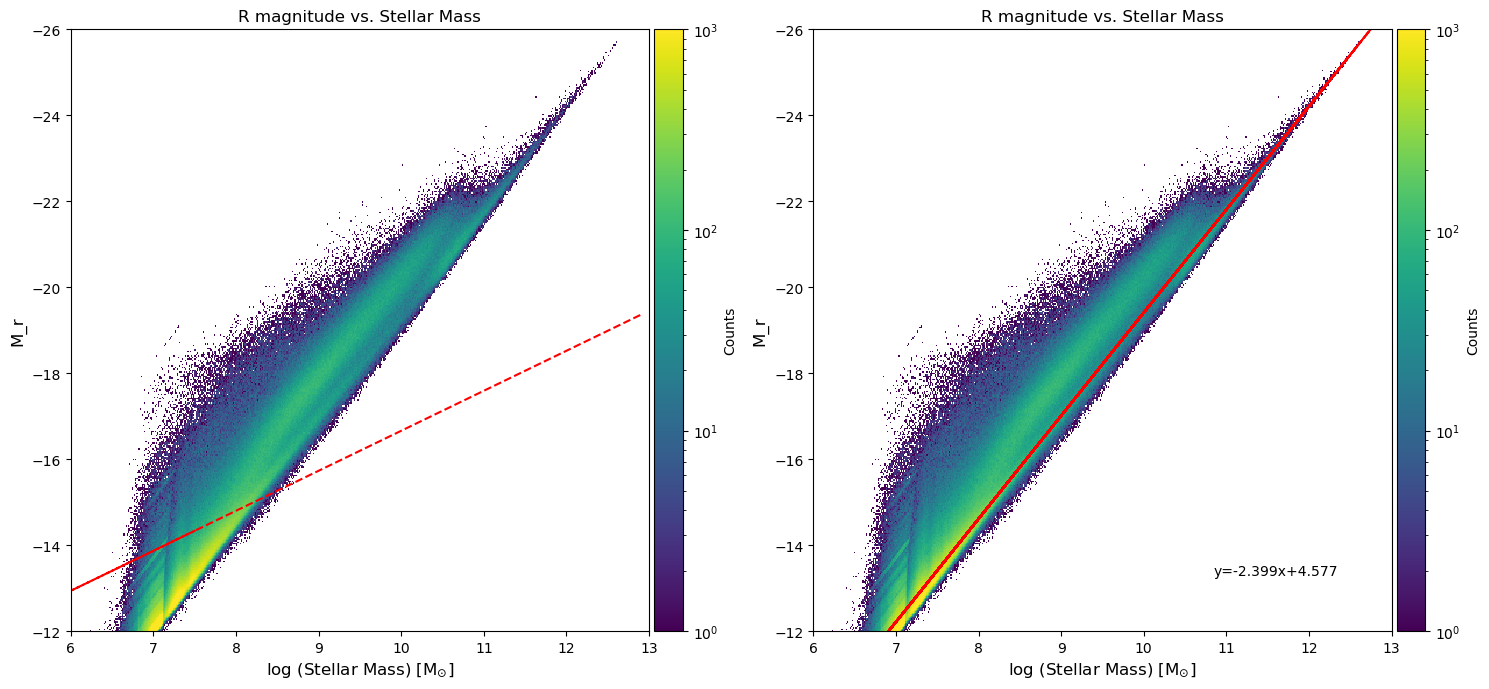

In [327]:
fig, ax = plt.subplots(1, 2, figsize=[15,7])

# Plot 1: Stellar mass vs luminosity fit:

ax[0].hist2d(np.log10(StellarMass_1), r_mag, bins=500, cmin=1, norm=LogNorm(vmin=1, vmax=1000))
m, b = np.polyfit(np.log10(StellarMass_1), r_mag, 1)
ax[0].plot(np.log10(StellarMass_1), m * np.log10(StellarMass_1) + b, color='red', linestyle='--', label='Linear fit') 

# Figure set-up:
ax[0].set_title('R magnitude vs. Stellar Mass')
ax[0].set_xlabel(r'log (Stellar Mass) [M$_{\odot}$]', fontsize=12)
ax[0].set_ylabel('M_r', fontsize=12)
ax[0].set_ylim([-12,-26])
ax[0].set_xlim([6., 13])

divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(h[3], cax=cax, label='Counts', norm=LogNorm())

plt.subplots_adjust(hspace=0.9)

# Plot 2: Stellar mass vs luminosity fit for M > log(StellarMass)=11

log11 = (StellarMass_1 > 1e11)


h = ax[1].hist2d(np.log10(StellarMass_1), r_mag, bins = 500, cmin=1, norm=LogNorm(vmin=1, vmax=1000))
m, b = np.polyfit(np.log10(StellarMass_1[log11]), r_mag[log11], 1)
ax[1].plot(np.log10(StellarMass_1), m * np.log10(StellarMass_1) + b, color='red', linestyle='--', label='Linear fit') 


divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(h[3], cax=cax, label='Counts', norm=LogNorm())
ax[1].set_title('R magnitude vs. Stellar Mass')
ax[1].set_xlabel(r'log (Stellar Mass) [M$_{\odot}$]', fontsize=12)
ax[1].set_ylabel('M_r', fontsize=12)
ax[1].set_ylim([-12,-26])
ax[1].set_xlim([6., 13])
ax[1].text(0.8, 0.1, 'y={:.3f}x+{:.3f}'.format(m,b), fontsize=10, horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

plt.tight_layout()
plt.show()

/tmp/ipykernel_1039083/2821566190.py:5: RuntimeWarning: divide by zero encountered in log10
  ax[0].hist2d(np.log10(DMMass), np.log10(StellarMass), range = [[9, 15], [7, 12]], bins=500, cmin=1, norm=LogNorm(vmin=1, vmax=1000))
/tmp/ipykernel_1039083/2821566190.py:20: RuntimeWarning: divide by zero encountered in log10
  h = ax[1].hist2d(np.log10(DMMass), np.log10(StellarMass/DMMass), bins = [500,500], range = [[8, 15], [-4, 0]], cmin=1, norm=LogNorm(vmin=1, vmax=1000))
/tmp/ipykernel_1039083/2821566190.py:20: RuntimeWarning: divide by zero encountered in divide
  h = ax[1].hist2d(np.log10(DMMass), np.log10(StellarMass/DMMass), bins = [500,500], range = [[8, 15], [-4, 0]], cmin=1, norm=LogNorm(vmin=1, vmax=1000))
/tmp/ipykernel_1039083/2821566190.py:20: RuntimeWarning: invalid value encountered in divide
  h = ax[1].hist2d(np.log10(DMMass), np.log10(StellarMass/DMMass), bins = [500,500], range = [[8, 15], [-4, 0]], cmin=1, norm=LogNorm(vmin=1, vmax=1000))


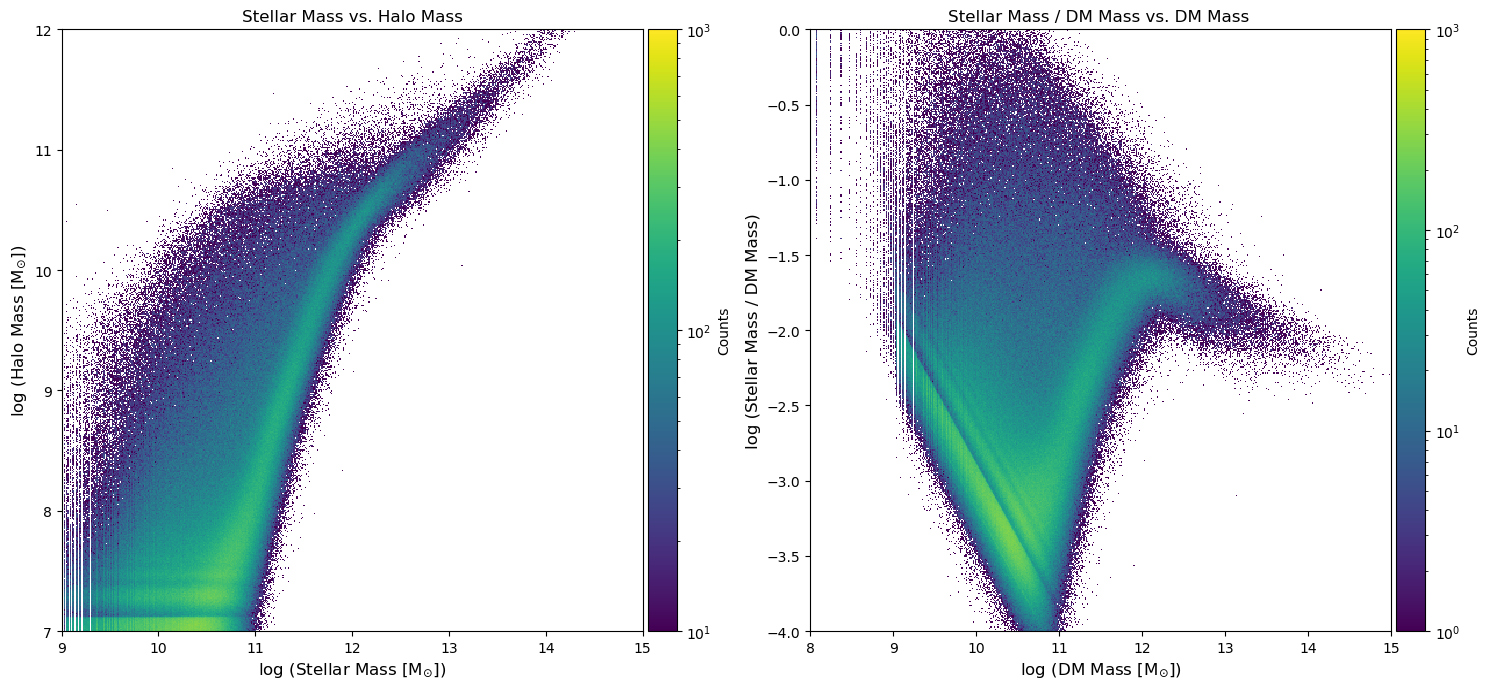

In [352]:
fig, ax = plt.subplots(1, 2, figsize=[15,7])

# Plot 1:

ax[0].hist2d(np.log10(DMMass), np.log10(StellarMass), range = [[9, 15], [7, 12]], bins=500, cmin=1, norm=LogNorm(vmin=1, vmax=1000))

divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(h[3], cax=cax, label='Counts', norm=LogNorm())

ax[0].set_title('Stellar Mass vs. Halo Mass', fontsize=12)
ax[0].set_xlabel(r'log (Stellar Mass [M$_{\odot}$])', fontsize=12)
ax[0].set_ylabel(r'log (Halo Mass [M$_{\odot}$])', fontsize=12)


plt.subplots_adjust(hspace=0.3)

# Plot 2:

h = ax[1].hist2d(np.log10(DMMass), np.log10(StellarMass/DMMass), bins = [500,500], range = [[8, 15], [-4, 0]], cmin=1, norm=LogNorm(vmin=1, vmax=1000))

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(h[3], cax=cax, label='Counts', norm=LogNorm())

ax[1].set_title('Stellar Mass / DM Mass vs. DM Mass ', fontsize=12)
ax[1].set_xlabel(r'log (DM Mass [M$_{\odot}$])', fontsize=12)
ax[1].set_ylabel(r'log (Stellar Mass / DM Mass)', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipykernel_1039083/2714607269.py:5: RuntimeWarning: divide by zero encountered in log10
  ax[0].hist2d(np.log10(DMMass), np.log10(StellarMass), range = [[9, 15], [7, 12]], bins=500, cmin=10, norm=LogNorm(vmin=10, vmax=1000))
/tmp/ipykernel_1039083/2714607269.py:20: RuntimeWarning: divide by zero encountered in log10
  h = ax[1].hist2d(np.log10(DMMass), np.log10(StellarMass/DMMass), bins = [500,500], range = [[8, 15], [-4, 0]], cmin=10, norm=LogNorm(vmin=10, vmax=1000))
/tmp/ipykernel_1039083/2714607269.py:20: RuntimeWarning: divide by zero encountered in divide
  h = ax[1].hist2d(np.log10(DMMass), np.log10(StellarMass/DMMass), bins = [500,500], range = [[8, 15], [-4, 0]], cmin=10, norm=LogNorm(vmin=10, vmax=1000))
/tmp/ipykernel_1039083/2714607269.py:20: RuntimeWarning: invalid value encountered in divide
  h = ax[1].hist2d(np.log10(DMMass), np.log10(StellarMass/DMMass), bins = [500,500], range = [[8, 15], [-4, 0]], cmin=10, norm=LogNorm(vmin=10, vmax=1000))


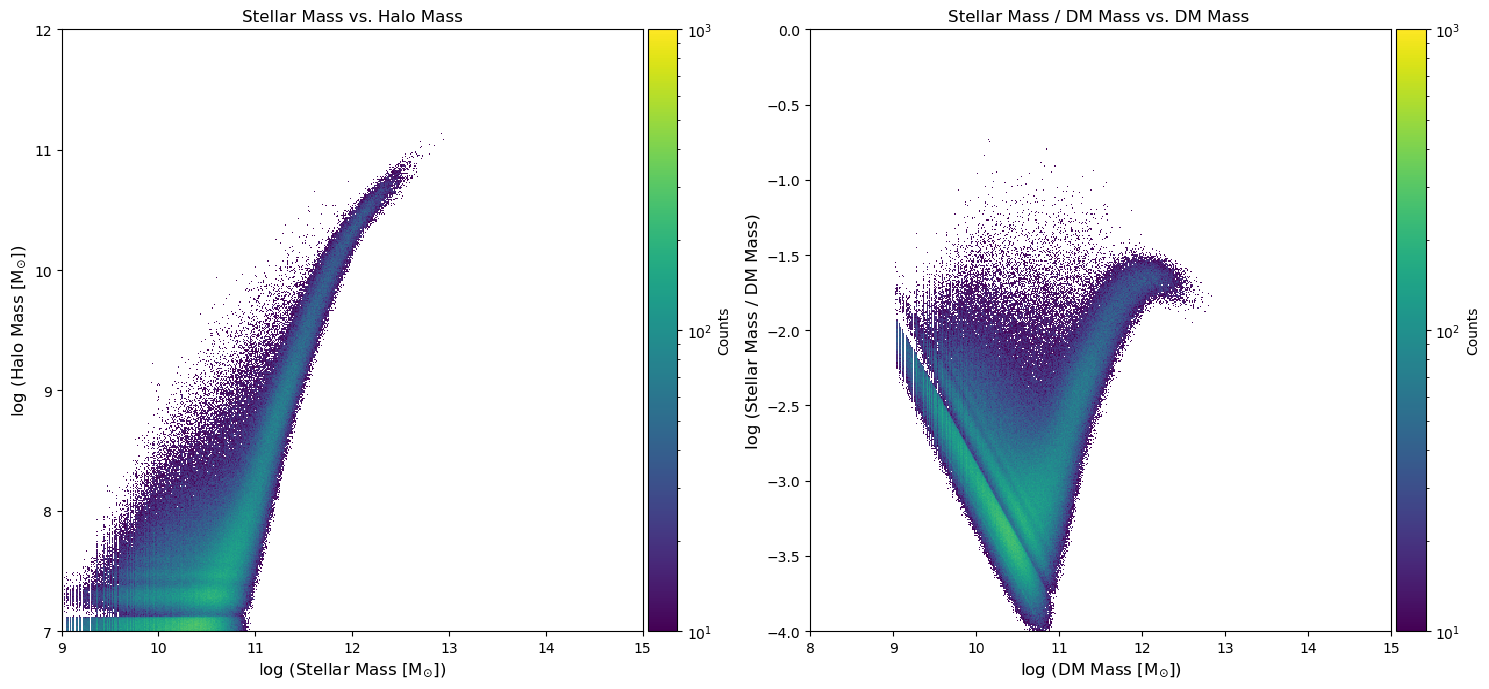

In [351]:
fig, ax = plt.subplots(1, 2, figsize=[15,7])

# Plot 1:

ax[0].hist2d(np.log10(DMMass), np.log10(StellarMass), range = [[9, 15], [7, 12]], bins=500, cmin=10, norm=LogNorm(vmin=10, vmax=1000))

divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(h[3], cax=cax, label='Counts', norm=LogNorm())

ax[0].set_title('Stellar Mass vs. Halo Mass', fontsize=12)
ax[0].set_xlabel(r'log (Stellar Mass [M$_{\odot}$])', fontsize=12)
ax[0].set_ylabel(r'log (Halo Mass [M$_{\odot}$])', fontsize=12)


plt.subplots_adjust(hspace=0.3)

# Plot 2:

h = ax[1].hist2d(np.log10(DMMass), np.log10(StellarMass/DMMass), bins = [500,500], range = [[8, 15], [-4, 0]], cmin=10, norm=LogNorm(vmin=10, vmax=1000))

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(h[3], cax=cax, label='Counts', norm=LogNorm())

ax[1].set_title('Stellar Mass / DM Mass vs. DM Mass ', fontsize=12)
ax[1].set_xlabel(r'log (DM Mass [M$_{\odot}$])', fontsize=12)
ax[1].set_ylabel(r'log (Stellar Mass / DM Mass)', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipykernel_1039083/2774519168.py:17: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(np.log10(StellarMass_1), r_mag, 1)
/tmp/ipykernel_1039083/2774519168.py:26: RuntimeWarning: divide by zero encountered in log10
  h_2 = ax[1].hist2d(np.log10(DMMass), StellarMass/DMMass, bins = [500, log_bins_y], range = [[10, 15], [1e-3, 1e-1]], cmin=10, norm=LogNorm(vmin=10, vmax=100))
/tmp/ipykernel_1039083/2774519168.py:26: RuntimeWarning: divide by zero encountered in divide
  h_2 = ax[1].hist2d(np.log10(DMMass), StellarMass/DMMass, bins = [500, log_bins_y], range = [[10, 15], [1e-3, 1e-1]], cmin=10, norm=LogNorm(vmin=10, vmax=100))
/tmp/ipykernel_1039083/2774519168.py:26: RuntimeWarning: invalid value encountered in divide
  h_2 = ax[1].hist2d(np.log10(DMMass), StellarMass/DMMass, bins = [500, log_bins_y], range = [[10, 15], [1e-3, 1e-1]], cmin=10, norm=LogNorm(vmin=10, vmax=100))
/tmp/ipykernel_1039083/2774519168.py:34: UserWarning: Attempt to set non-positive ylim on a lo

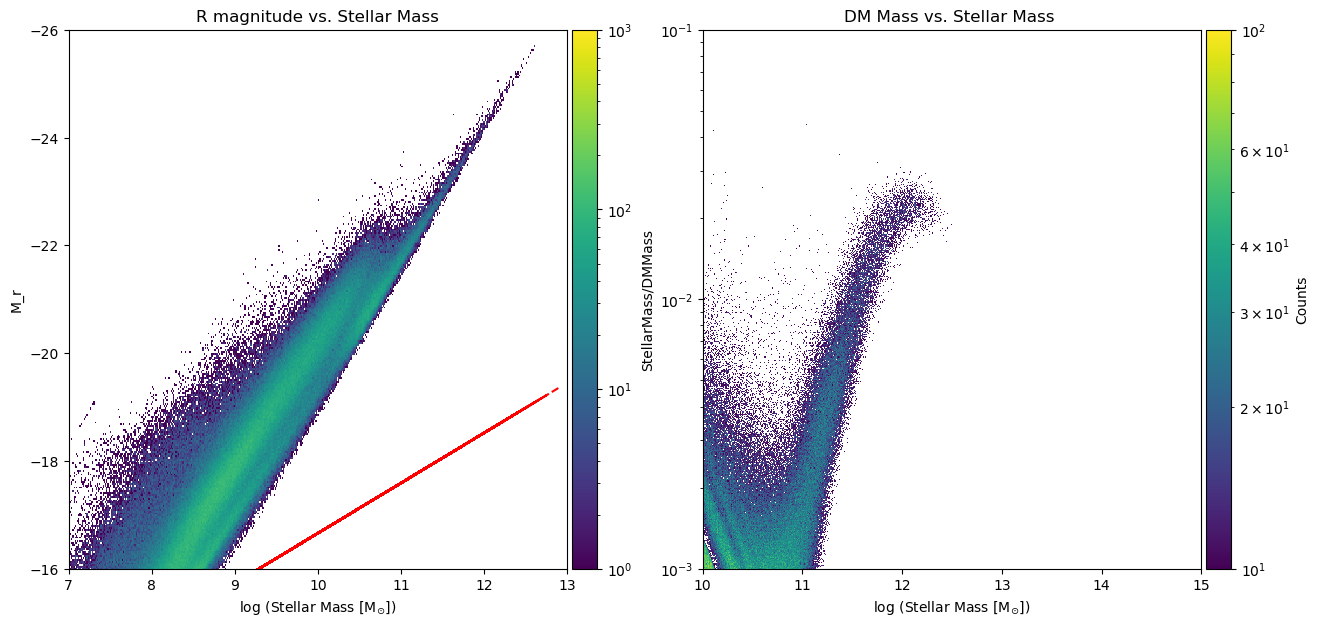

In [264]:
fig, ax = plt.subplots(1, 2, figsize=[15,7])

# Plot 1:

h_1 = ax[0].hist2d(np.log10(StellarMass_1), r_mag, bins=500, cmin=1, norm=LogNorm(vmin=1, vmax=1000))

divider_1 = make_axes_locatable(ax[0])
cax_1 = divider_1.append_axes("right", size="5%", pad=0.05)
cbar_1 = fig.colorbar(h_1[3], cax=cax_1, norm=LogNorm())

ax[0].set_title('R magnitude vs. Stellar Mass')
ax[0].set_xlabel(r'log (Stellar Mass [M$_{\odot}$])')
ax[0].set_ylabel('M_r')
ax[0].set_ylim([-16,-26])
ax[0].set_xlim([7., 13])

m, b = np.polyfit(np.log10(StellarMass_1), r_mag, 1)
ax[0].plot(np.log10(StellarMass_1), m * np.log10(StellarMass_1) + b, color='red', linestyle='--', label='Linear fit') 


# Plot 2:

log_bins_x = np.logspace(np.log10(10), np.log10(15), 501)  # 501 bins desde 10^1 hasta 10^1.1761
log_bins_y = np.logspace(np.log10(1e-3), np.log10(1e-1), 501)  # 501 bins desde 10^-3 hasta 10^-1

h_2 = ax[1].hist2d(np.log10(DMMass), StellarMass/DMMass, bins = [500, log_bins_y], range = [[10, 15], [1e-3, 1e-1]], cmin=10, norm=LogNorm(vmin=10, vmax=100))


divider_2 = make_axes_locatable(ax[1])
cax_2 = divider_2.append_axes("right", size="5%", pad=0.05)
cbar_2 = fig.colorbar(h_2[3], cax=cax_2, label='Counts', norm=LogNorm())

ax[1].set_yscale('log')
ax[1].set_ylim([0, 0.1])
ax[1].set_title('DM Mass vs. Stellar Mass ')
ax[1].set_xlabel(r'log (Stellar Mass [M$_{\odot}$])')
ax[1].set_ylabel('StellarMass/DMMass')

plt.show()

/tmp/ipykernel_1039083/2958360935.py:17: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(np.log10(StellarMass_1), r_mag, 1)
/tmp/ipykernel_1039083/2958360935.py:27: RuntimeWarning: divide by zero encountered in log10
  h_2 = ax[1].hist2d(np.log10(StellarMass), np.log10(StellarMass/SubhaloMass), bins = [500, 500], range = [[6, 12], [-3, 1]], cmin=10, norm=LogNorm(vmin=10, vmax=1000))


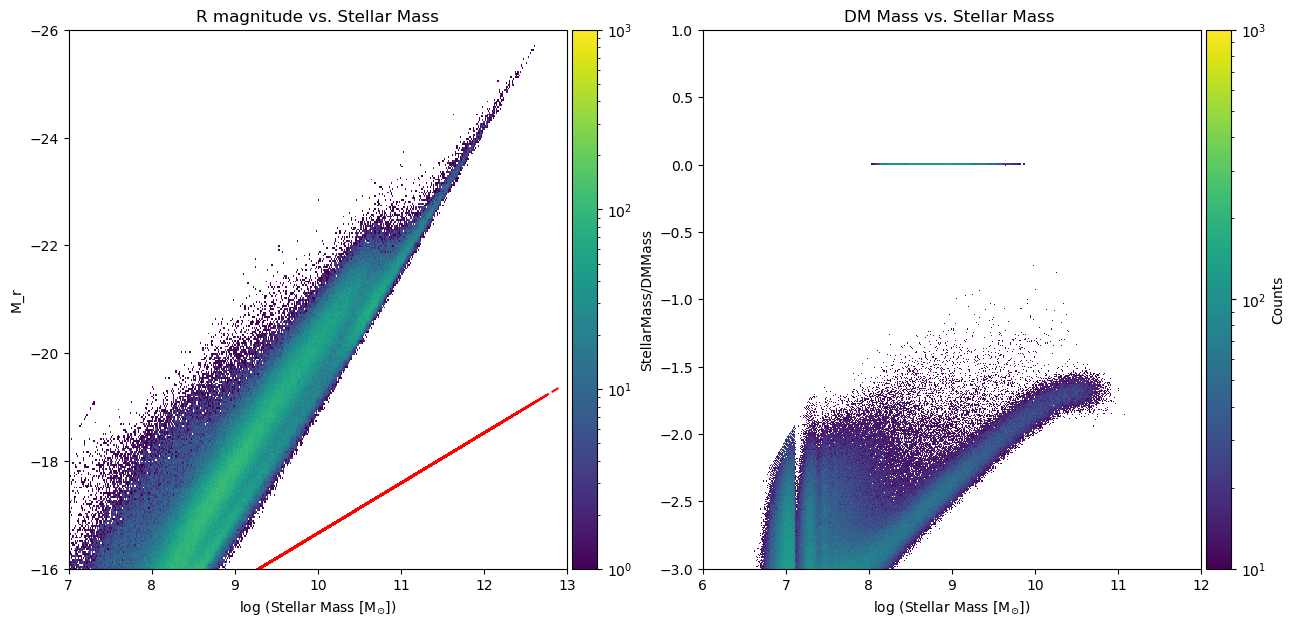

In [303]:
fig, ax = plt.subplots(1, 2, figsize=[15,7])

# Plot 1:

h_1 = ax[0].hist2d(np.log10(StellarMass_1), r_mag, bins=500, cmin=1, norm=LogNorm(vmin=1, vmax=1000))

divider_1 = make_axes_locatable(ax[0])
cax_1 = divider_1.append_axes("right", size="5%", pad=0.05)
cbar_1 = fig.colorbar(h_1[3], cax=cax_1, norm=LogNorm())

ax[0].set_title('R magnitude vs. Stellar Mass')
ax[0].set_xlabel(r'log (Stellar Mass [M$_{\odot}$])')
ax[0].set_ylabel('M_r')
ax[0].set_ylim([-16,-26])
ax[0].set_xlim([7., 13])

m, b = np.polyfit(np.log10(StellarMass_1), r_mag, 1)
ax[0].plot(np.log10(StellarMass_1), m * np.log10(StellarMass_1) + b, color='red', linestyle='--', label='Linear fit') 


# Plot 2:

log_bins_x = np.logspace(np.log10(6), np.log10(12), 501)  # 501 bins desde 10^1 hasta 10^1.1761
log_bins_y = np.logspace(np.log10(1e-1), np.log10(2), 501)  # 501 bins desde 10^-3 hasta 10^-1
lin_bins_y = np.linspace(0.8, 1.2, 501)

h_2 = ax[1].hist2d(np.log10(StellarMass), np.log10(StellarMass/SubhaloMass), bins = [500, 500], range = [[6, 12], [-3, 1]], cmin=10, norm=LogNorm(vmin=10, vmax=1000))


divider_2 = make_axes_locatable(ax[1])
cax_2 = divider_2.append_axes("right", size="5%", pad=0.05)
cbar_2 = fig.colorbar(h_2[3], cax=cax_2, label='Counts', norm=LogNorm())

#ax[1].set_yscale('log')
#ax[1].set_ylim([0, 0.1])
ax[1].set_title('DM Mass vs. Stellar Mass ')
ax[1].set_xlabel(r'log (Stellar Mass [M$_{\odot}$])')
ax[1].set_ylabel('StellarMass/DMMass')

plt.show()

/tmp/ipykernel_1039083/24448785.py:17: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(np.log10(StellarMass_1), r_mag, 1)
/tmp/ipykernel_1039083/24448785.py:27: RuntimeWarning: divide by zero encountered in log10
  h_2 = ax[1].hist2d(np.log10(DMMass), np.log10(StellarMass/DMMass), bins = [500, 500], range = [[8, 14], [-4, -1]], cmin=10, norm=LogNorm(vmin=10, vmax=1000))
/tmp/ipykernel_1039083/24448785.py:27: RuntimeWarning: divide by zero encountered in divide
  h_2 = ax[1].hist2d(np.log10(DMMass), np.log10(StellarMass/DMMass), bins = [500, 500], range = [[8, 14], [-4, -1]], cmin=10, norm=LogNorm(vmin=10, vmax=1000))
/tmp/ipykernel_1039083/24448785.py:27: RuntimeWarning: invalid value encountered in divide
  h_2 = ax[1].hist2d(np.log10(DMMass), np.log10(StellarMass/DMMass), bins = [500, 500], range = [[8, 14], [-4, -1]], cmin=10, norm=LogNorm(vmin=10, vmax=1000))


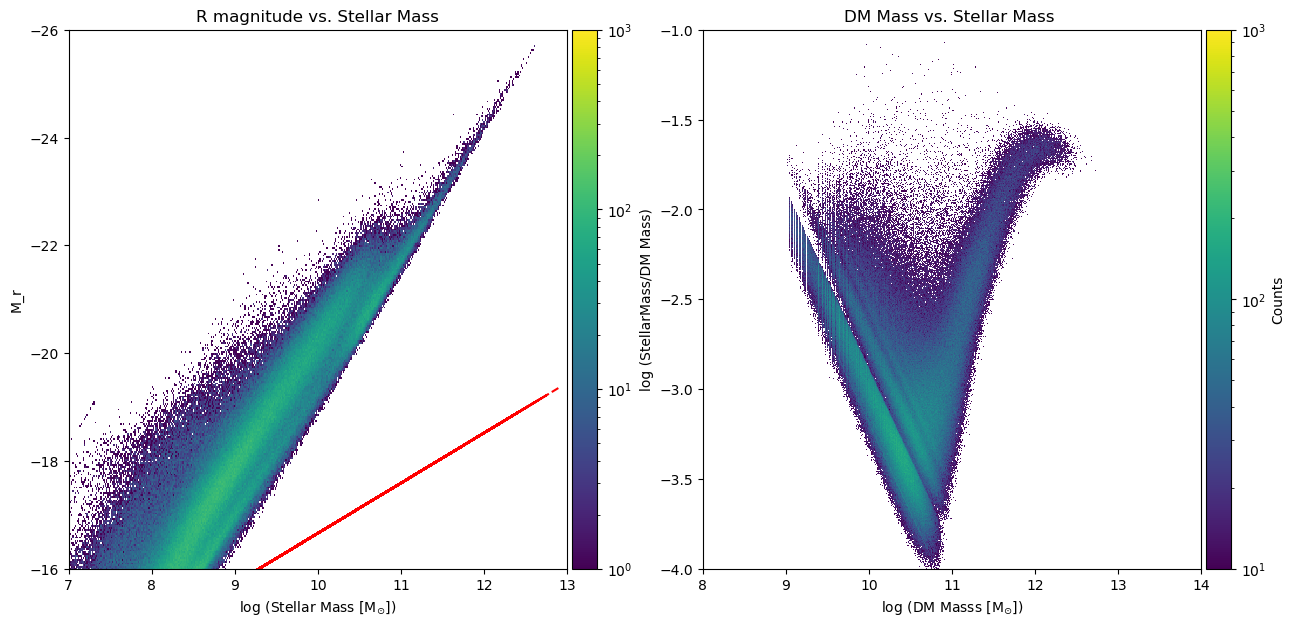

In [339]:
fig, ax = plt.subplots(1, 2, figsize=[15,7])

# Plot 1:

h_1 = ax[0].hist2d(np.log10(StellarMass_1), r_mag, bins=500, cmin=1, norm=LogNorm(vmin=1, vmax=1000))

divider_1 = make_axes_locatable(ax[0])
cax_1 = divider_1.append_axes("right", size="5%", pad=0.05)
cbar_1 = fig.colorbar(h_1[3], cax=cax_1, norm=LogNorm())

ax[0].set_title('R magnitude vs. Stellar Mass')
ax[0].set_xlabel(r'log (Stellar Mass [M$_{\odot}$])')
ax[0].set_ylabel('M_r')
ax[0].set_ylim([-16,-26])
ax[0].set_xlim([7., 13])

m, b = np.polyfit(np.log10(StellarMass_1), r_mag, 1)
ax[0].plot(np.log10(StellarMass_1), m * np.log10(StellarMass_1) + b, color='red', linestyle='--', label='Linear fit') 


# Plot 2:

log_bins_x = np.logspace(np.log10(9), np.log10(15), 501)  # 501 bins desde 10^1 hasta 10^1.1761
log_bins_y = np.logspace(np.log10(1e-6), np.log10(1e-1), 501)  # 501 bins desde 10^-3 hasta 10^-1
lin_bins_y = np.linspace(0.00001, 1, 501)

h_2 = ax[1].hist2d(np.log10(DMMass), np.log10(StellarMass/DMMass), bins = [500, 500], range = [[8, 14], [-4, -1]], cmin=10, norm=LogNorm(vmin=10, vmax=1000))


divider_2 = make_axes_locatable(ax[1])
cax_2 = divider_2.append_axes("right", size="5%", pad=0.05)
cbar_2 = fig.colorbar(h_2[3], cax=cax_2, label='Counts', norm=LogNorm())


ax[1].set_ylim([-4, -1])
ax[1].set_title('DM Mass vs. Stellar Mass ')
ax[1].set_xlabel(r'log (DM Masss [M$_{\odot}$])')
ax[1].set_ylabel(r'log (StellarMass/DM Mass)')

plt.show()

/tmp/ipykernel_1039083/3020888782.py:17: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(np.log10(StellarMass_1), r_mag, 1)
/tmp/ipykernel_1039083/3020888782.py:27: RuntimeWarning: divide by zero encountered in log10
  h_2 = ax[1].hist2d(np.log10(StellarMass), np.log10(SubhaloMass), bins = [500, 500], range = [[7, 13], [7, 15]], cmin=10, norm=LogNorm(vmin=10, vmax=1000))


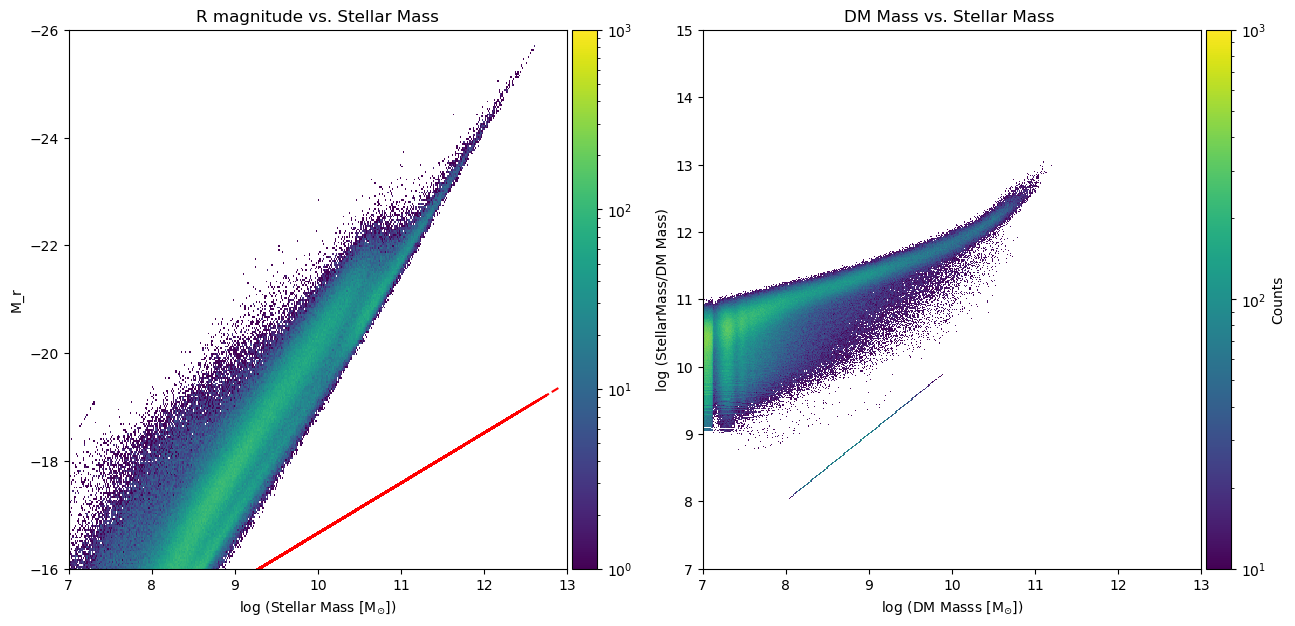

In [297]:
fig, ax = plt.subplots(1, 2, figsize=[15,7])

# Plot 1:

h_1 = ax[0].hist2d(np.log10(StellarMass_1), r_mag, bins=500, cmin=1, norm=LogNorm(vmin=1, vmax=1000))

divider_1 = make_axes_locatable(ax[0])
cax_1 = divider_1.append_axes("right", size="5%", pad=0.05)
cbar_1 = fig.colorbar(h_1[3], cax=cax_1, norm=LogNorm())

ax[0].set_title('R magnitude vs. Stellar Mass')
ax[0].set_xlabel(r'log (Stellar Mass [M$_{\odot}$])')
ax[0].set_ylabel('M_r')
ax[0].set_ylim([-16,-26])
ax[0].set_xlim([7., 13])

m, b = np.polyfit(np.log10(StellarMass_1), r_mag, 1)
ax[0].plot(np.log10(StellarMass_1), m * np.log10(StellarMass_1) + b, color='red', linestyle='--', label='Linear fit') 


# Plot 2:

log_bins_x = np.logspace(np.log10(9), np.log10(15), 501)  # 501 bins desde 10^1 hasta 10^1.1761
log_bins_y = np.logspace(np.log10(1e-6), np.log10(1e-1), 501)  # 501 bins desde 10^-3 hasta 10^-1
lin_bins_y = np.linspace(0.00001, 1, 501)

h_2 = ax[1].hist2d(np.log10(StellarMass), np.log10(SubhaloMass), bins = [500, 500], range = [[7, 13], [7, 15]], cmin=10, norm=LogNorm(vmin=10, vmax=1000))


divider_2 = make_axes_locatable(ax[1])
cax_2 = divider_2.append_axes("right", size="5%", pad=0.05)
cbar_2 = fig.colorbar(h_2[3], cax=cax_2, label='Counts', norm=LogNorm())


#ax[1].set_ylim([-4, -1])
ax[1].set_title('DM Mass vs. Stellar Mass ')
ax[1].set_xlabel(r'log (DM Masss [M$_{\odot}$])')
ax[1].set_ylabel(r'log (StellarMass/DM Mass)')

plt.show()

Bonus: in order to have a clearer picture of how galaxies populate the distributions, perform
a 2D histogram of the data (with pyplot) or make a contour plot to show the density of the data
(using numpy and pyplot).